Notebook to explore Live Ocean results from Parker MacCready and group (http://faculty.washington.edu/pmacc/LO/LiveOcean.html). Goal is to determine a region for extracting boundary conditions.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt

from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
f = nc.Dataset('/data/nsoontie/MEOPAR/LiveOcean/20160608/ocean_his_0002.nc')

In [3]:
f.variables

OrderedDict([('ntimes', <class 'netCDF4._netCDF4.Variable'>
              int32 ntimes()
                  long_name: number of long time-steps
              unlimited dimensions: 
              current shape = ()
              filling off), ('ndtfast', <class 'netCDF4._netCDF4.Variable'>
              int32 ndtfast()
                  long_name: number of short time-steps
              unlimited dimensions: 
              current shape = ()
              filling off), ('dt', <class 'netCDF4._netCDF4.Variable'>
              float64 dt()
                  long_name: size of long time-steps
                  units: second
              unlimited dimensions: 
              current shape = ()
              filling off), ('dtfast', <class 'netCDF4._netCDF4.Variable'>
              float64 dtfast()
                  long_name: size of short time-steps
                  units: second
              unlimited dimensions: 
              current shape = ()
              filling off), ('dstart', 

Lots of output! I am interested in:
* salt
* temp (which is described as potential temperature)
* lat_rho, lon_rho, mask_rho
* pn, pm (1/DY, 1/DX)
* ocean_time
* s_rho, hc, Cs_r, Vtransform (vertical grid stuff: Parker sent some code for translating into a depth)
* zeta (ssh)
* h (bathymetry at rho points)

Anything else?

### Timing variables

In [4]:
dt = f.variables['dt']
ntimes = f.variables['ntimes']
ntimes[:]*dt[:]/86400

3.0

It appears as if this file was part of a three day simulation.

In [5]:
ocean_time = f.variables['ocean_time']
ocean_time[:]

array([  1.46534760e+09])

In [6]:
ocean_time

<class 'netCDF4._netCDF4.Variable'>
float64 ocean_time(ocean_time)
    long_name: time since initialization
    units: seconds since 1970-01-01 00:00:00
    calendar: gregorian
    field: time, scalar, series
unlimited dimensions: ocean_time
current shape = (1,)
filling off

In [7]:
time = nc.num2date(ocean_time[:], ocean_time.units)
time

array([datetime.datetime(2016, 6, 8, 1, 0)], dtype=object)

It is fairly easy to grab the snap shot time using ocean_time and the nc.num2date method.

### Surface plots of salinity

In [8]:
sal = f.variables['salt']
lon_rho = f.variables['lon_rho']
lat_rho = f.variables['lat_rho']
s_rho = f.variables['s_rho']

In [9]:
sal

<class 'netCDF4._netCDF4.Variable'>
float32 salt(ocean_time, s_rho, eta_rho, xi_rho)
    long_name: salinity
    time: ocean_time
    coordinates: lon_rho lat_rho s_rho ocean_time
    field: salinity, scalar, series
    _FillValue: 1e+37
unlimited dimensions: ocean_time
current shape = (1, 40, 381, 174)
filling off

In [10]:
b = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

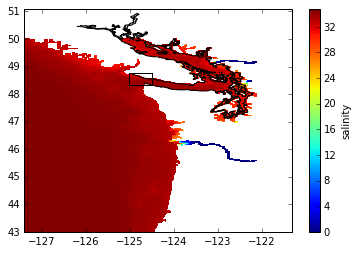

In [11]:
fig,ax=plt.subplots(1,1)
mesh=ax.pcolormesh(lon_rho, lat_rho, sal[0,0,:,:])
cbar=plt.colorbar(mesh,ax=ax)
cbar.set_label('salinity')
viz_tools.plot_coastline(ax,b,coords='map')
iss = 55
iee = 80
jss = 295
jee = 325
ax.plot([lon_rho[jss,iss], lon_rho[jss,iee]],
         [lat_rho[jss,iss], lat_rho[jss,iee]], '-k')
ax.plot([lon_rho[jss,iss], lon_rho[jee,iss]],
         [lat_rho[jss,iss], lat_rho[jee,iss]], '-k')
ax.plot([lon_rho[jee,iss], lon_rho[jee,iee]],
         [lat_rho[jee,iss], lat_rho[jee,iee]], '-k')
ax.plot([lon_rho[jee,iee], lon_rho[jss,iee]],
         [lat_rho[jee,iee], lat_rho[jss,iee]], '-k')

(48.3, 48.9)

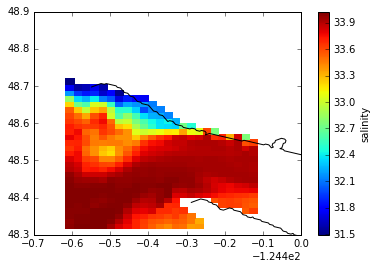

In [12]:
fig,ax=plt.subplots(1,1)
mesh=ax.pcolormesh(lon_rho[jss:jee,iss:iee],
               lat_rho[jss:jee,iss:iee],
               sal[0,0,jss:jee,iss:iee])
cbar=plt.colorbar(mesh,ax=ax)
cbar.set_label('salinity')
viz_tools.plot_coastline(ax,b,coords='map')
ax.set_xlim([-125.1,-124.4])
ax.set_ylim([48.3,48.9])

### Bathymetry

In [13]:
h = f.variables['h']
h

<class 'netCDF4._netCDF4.Variable'>
float64 h(eta_rho, xi_rho)
    long_name: bathymetry at RHO-points
    units: meter
    coordinates: lon_rho lat_rho
    field: bath, scalar
unlimited dimensions: 
current shape = (381, 174)
filling off

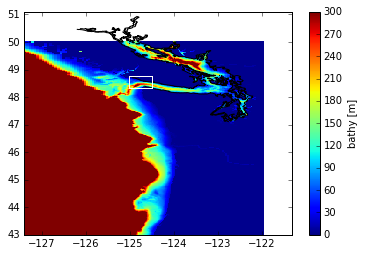

In [14]:
fig,ax=plt.subplots(1,1)
mesh=ax.pcolormesh(lon_rho, lat_rho, h,vmin=0,vmax=300)
cbar=plt.colorbar(mesh,ax=ax)
cbar.set_label('bathy [m]')
viz_tools.plot_coastline(ax,b,coords='map')
ax.plot([lon_rho[jss,iss], lon_rho[jss,iee]],
         [lat_rho[jss,iss], lat_rho[jss,iee]], '-w')
ax.plot([lon_rho[jss,iss], lon_rho[jee,iss]],
         [lat_rho[jss,iss], lat_rho[jee,iss]], '-w')
ax.plot([lon_rho[jee,iss], lon_rho[jee,iee]],
         [lat_rho[jee,iss], lat_rho[jee,iee]], '-w')
ax.plot([lon_rho[jee,iee], lon_rho[jss,iee]],
         [lat_rho[jee,iee], lat_rho[jss,iee]], '-w')

(48.3, 48.9)

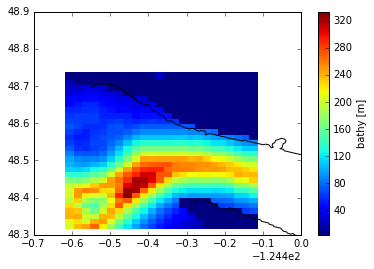

In [15]:
fig,ax=plt.subplots(1,1)
mesh=ax.pcolormesh(lon_rho[jss:jee,iss:iee],
               lat_rho[jss:jee,iss:iee],
               h[jss:jee,iss:iee])
cbar=plt.colorbar(mesh,ax=ax)
cbar.set_label('bathy [m]')
viz_tools.plot_coastline(ax,b,coords='map')
ax.set_xlim([-125.1,-124.4])
ax.set_ylim([48.3,48.9])

This region looks reasonable. I need to go in the mouth a little bit because our BCs cover the first 10 grid points. 

### What's next?
* What frequency is appropriate? We can have access to hourly snapshots.
* Develop some scripts that would extract this region and the variables I want. Python or bash?

## Check out sudomain file

In [16]:
f2 = nc.Dataset('/data/nsoontie/MEOPAR/LiveOcean/20160608/ocean_his_0002_UBC.nc')
f2.variables

OrderedDict([('salt', <class 'netCDF4._netCDF4.Variable'>
              float32 salt(ocean_time, s_rho, eta_rho, xi_rho)
                  _FillValue: 1e+37
                  time: ocean_time
                  field: salinity, scalar, series
                  long_name: salinity
                  coordinates: lon_rho lat_rho s_rho ocean_time
              unlimited dimensions: ocean_time
              current shape = (1, 40, 31, 26)
              filling on), ('temp', <class 'netCDF4._netCDF4.Variable'>
              float32 temp(ocean_time, s_rho, eta_rho, xi_rho)
                  units: Celsius
                  _FillValue: 1e+37
                  time: ocean_time
                  coordinates: lon_rho lat_rho s_rho ocean_time
                  long_name: potential temperature
                  field: temperature, scalar, series
              unlimited dimensions: ocean_time
              current shape = (1, 40, 31, 26)
              filling on), ('h', <class 'netCDF4._netCDF4.Varia

In [17]:
ocean_time2 = f2.variables['ocean_time']
time2 = nc.num2date(ocean_time2[:], ocean_time2.units)
time2

array([datetime.datetime(2016, 6, 8, 1, 0)], dtype=object)

In [18]:
sal2 = f2.variables['salt']
lon_rho2 = f2.variables['lon_rho']
lat_rho2 = f2.variables['lat_rho']
s_rho2 = f2.variables['s_rho']

In [19]:
sal2

<class 'netCDF4._netCDF4.Variable'>
float32 salt(ocean_time, s_rho, eta_rho, xi_rho)
    _FillValue: 1e+37
    time: ocean_time
    field: salinity, scalar, series
    long_name: salinity
    coordinates: lon_rho lat_rho s_rho ocean_time
unlimited dimensions: ocean_time
current shape = (1, 40, 31, 26)
filling on

In [20]:
sal

<class 'netCDF4._netCDF4.Variable'>
float32 salt(ocean_time, s_rho, eta_rho, xi_rho)
    long_name: salinity
    time: ocean_time
    coordinates: lon_rho lat_rho s_rho ocean_time
    field: salinity, scalar, series
    _FillValue: 1e+37
unlimited dimensions: ocean_time
current shape = (1, 40, 381, 174)
filling off

(48.3, 48.9)

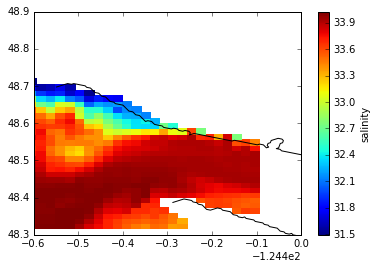

In [21]:
fig,ax=plt.subplots(1,1)
mesh=ax.pcolormesh(lon_rho2, lat_rho2, sal2[0,0,:,:])
cbar=plt.colorbar(mesh,ax=ax)
cbar.set_label('salinity')
viz_tools.plot_coastline(ax,b,coords='map')
ax.set_xlim([-125,-124.4])
ax.set_ylim([48.3,48.9])